In [17]:
import numpy as np
import pandas
import random
from typing import Callable
import matplotlib.pyplot as plt
from itertools import combinations
from matplotlib import animation, rc
from IPython.display import HTML
import matplotlib
import copy
from scipy.spatial import distance_matrix
from typing import Tuple, List

array([[0, 3, 4, 5],
       [3, 0, 5, 3],
       [4, 5, 0, 4],
       [5, 3, 4, 0]])

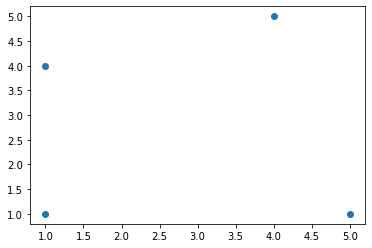

In [13]:
points = np.array([[0, 0], [0, 3], [4, 0], [3, 4]]) + np.array([1, 1])
plt.scatter(points[:, 0], points[:, 1]);
points
distance_matrix(points, points).astype(int)


In [51]:
n_cities, _ = points.shape
list(combinations(np.arange(n_cities), 2))

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

In [65]:
# Получаем какую то перестановку берем по две точки, меняем их местами
from itertools import permutations

# Get all permutations of [1, 2, 3]
perm = list(permutations(np.arange(n_cities)))[13]
print(perm)
for i, j in list(combinations(perm, 2)):
    if i > j:
        print((i, j))

(2, 0, 3, 1)
(2, 0)
(2, 1)
(3, 1)


In [14]:
def cyclic_distance(points: np.ndarray, dist: Callable) -> float:
    points_to = np.roll(points, 1, axis=0)
    return dist(points, points_to).sum()

def l2_distance(p1: np.ndarray, p2: np.ndarray) -> float:
    diff = p1 - p2
    return np.sqrt(diff.dot(diff))

def l1_distance(p1: np.ndarray, p2: np.ndarray) -> float:
    return np.sum(np.abs(p2 - p1))

In [19]:
class HillClimb:
    def __init__(self, max_iterations, dist):
        self.max_iterations = max_iterations
        self.dist = dist # Do not change

    def optimize(self, points) -> np.ndarray:
        return self.optimize_explain(points)[-1] # Возвращает путь коми в обратном порядке

    def optimize_explain(self, points: np.ndarray) -> List[np.ndarray]:
        points = points.copy()
        permutations = []

        cur_dist = cyclic_distance(points, self.dist) # Посчитали первое расстояние от рандомных точек
        for i in range(self.max_iterations): # Итерируемся пока итерируется
            (i, j), new_dist = self._get_swap(points, cur_dist) # Считаем лучшую перестановку
            if new_dist is None: # Если мы пришли на камушек останавливаемся
                break
            points[[i, j]] = points[[j, i]]
            permutations.append(points.copy())
            cur_dist = new_dist
        print(f"best score: {cur_dist}")
        return permutations

    def _get_swap(self, points: np.ndarray, cur_dist: float) -> Tuple[Tuple[int, int], float]:
        n_points = points.shape[0]
        best_swap, best_dist = None, None
        for i, j in combinations(range(n_points), 2):
            if i >= j:
                continue
            if i == 0 and j == n_points - 1:
                i, j = j, i

            old_dists = self.dist(points[i], points[(i - 1 + n_points) % n_points]) +\
                        self.dist(points[j], points[(j + 1) % n_points])
            new_dists = self.dist(points[i], points[(j + 1) % n_points]) +\
                        self.dist(points[j], points[(i - 1 + n_points) % n_points])

            if (j - i + n_points) % n_points > 1:
                old_dists += self.dist(points[i], points[(i + 1) % n_points]) +\
                             self.dist(points[j], points[(j - 1 + n_points) % n_points])
                new_dists += self.dist(points[i], points[(j - 1 + n_points) % n_points]) +\
                             self.dist(points[j], points[(i + 1) % n_points])

            full_dist = cur_dist - old_dists + new_dists
            if best_dist is None or best_dist > full_dist:
                best_swap, best_dist = (i, j), full_dist

        return best_swap, best_dist

In [27]:
dist = l1_distance

In [22]:
n_cities, _ = points.shape
points

array([[1, 1],
       [1, 4],
       [5, 1],
       [4, 5]])

In [26]:
init_walk = np.arange(n_cities)
np.random.shuffle(init_walk)
init_walk

array([3, 0, 1, 2])

In [33]:
cur_distance = sum([dist(points[i], points[i+1])  for i in range(n_cities-1)])
cur_distance

15

In [40]:
for i in range(n_cities):
    for j in range(i + 1, n_cities):
        cur_walk = init_walk.copy()
        cur_walk[i], cur_walk[j] = init_walk[j], init_walk[i]
        print(f"swap {i, j}", cur_walk, init_walk)

swap (0, 1) [1 2 0 3] [2 1 0 3]
swap (0, 2) [0 1 2 3] [2 1 0 3]
swap (0, 3) [3 1 0 2] [2 1 0 3]
swap (1, 2) [2 0 1 3] [2 1 0 3]
swap (1, 3) [2 3 0 1] [2 1 0 3]
swap (2, 3) [2 1 3 0] [2 1 0 3]
